<a href="https://colab.research.google.com/github/JuliaVazTostes/curso_data_science/blob/master/M%C3%B3dulo_3_Gr%C3%A1fico_de_Area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráfico de Área

Este gráfico de área específico é chamado de *stacked area chart* (algo como gráfico de área empilhada), e é muito útil para acompanharmos a evolução de diversas variáveis numéricas - tudo plotado no mesmo gráfico.

Intuitivo e de fácil compreensão, como coloca as áreas de maneira sobreposta, permite tirar conclusões em termos relativos.

<center><img src="https://pandas-xlsxwriter-charts.readthedocs.io/_images/chart_stacked_area2.png" height="300px"></center>

## Plotar o gráfico de área

Para exemplificar o gráfico de linhas, vou usar um dataset contendo o número de casos (mensal) de dengue para a cidade de Campinas-SP.

Além do número de casos confirmados de dengue, o dataset mostra ainda dados relacionados à chuva, temperaturas média, mínima e máxima do município. O período contemplado pelo conjunto de dados é de 1998 a 2015.

In [1]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# importar dados para dataframe
data = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/dengue-dataset.csv"
df = pd.read_csv(data, index_col="data", parse_dates=True)

# ver as 5 primeiras entradas
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


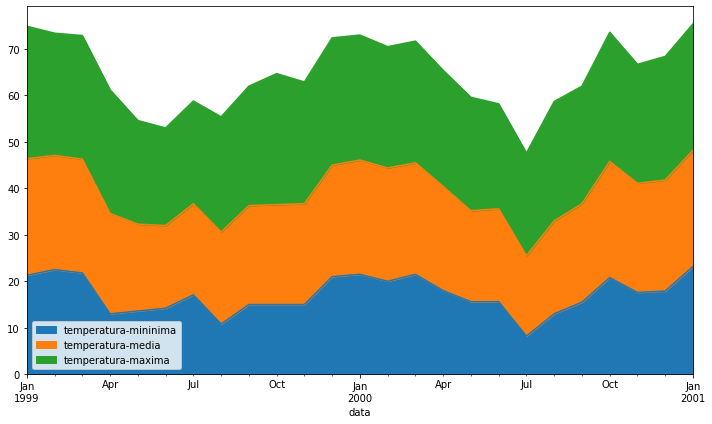

In [2]:
# plotar o gráfico de área com as temperaturas
fig, ax = plt.subplots(figsize=(10,6))

# Selecionar o período que se deseja plotar
df.loc['1999-01-01':'2001-01-01', ['temperatura-mininima',
                                   'temperatura-media',
                                   'temperatura-maxima']].plot.area(ax=ax)

plt.tight_layout()

In [5]:
# Plotar Temperratura média x Casos confirmados
# Selecionar as colunas que se deseja plotar para análisar os valores presentes
df.loc[:,['casos-confirmados', 'temperatura-mininima']]


,casos-confirmados,temperatura-mininima
data,,
1998-01-01,237,20.2
1998-02-01,331,20.0
1998-03-01,562,22.4
1998-04-01,187,18.1
1998-05-01,32,15.7
...,...,...
2014-08-01,55,13.1
2014-09-01,40,18.6
2014-10-01,40,17.2


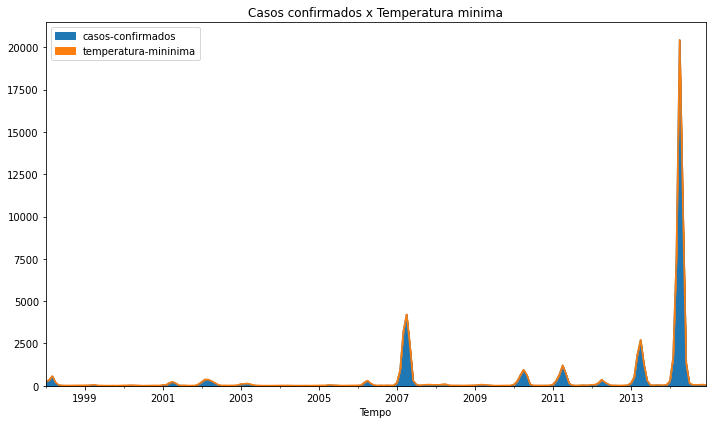

In [29]:
# Plotar o gráfico

fig, ax = plt.subplots(figsize=(10,6))
df.loc[:,['casos-confirmados', 'temperatura-mininima']].plot.area(ax=ax)
ax.set_title("Casos confirmados x Temperatura minima")
ax.set_xlabel("Tempo")

plt.tight_layout();

In [18]:
# Como percebemos pela figura, são dados com grandezas diferentes, então para a visualização não ficar prejudicada é necessário normalizá-los antes
df_norm=(df-df.mean())/df.std()

df_norm.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,-0.069203,0.647304,1.458312,0.755501,1.126648
1998-02-01,-0.015237,1.134722,1.208245,0.695554,1.082201
1998-03-01,0.117384,0.335811,1.083212,1.414911,0.726624
1998-04-01,-0.097909,-0.726988,0.207980,0.126064,0.193258
1998-05-01,-0.186897,-0.293382,-1.250740,-0.593293,-1.184603


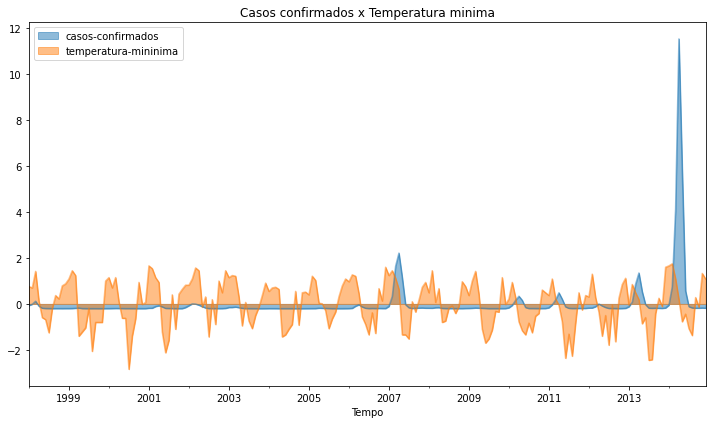

In [26]:
# plotar o gráfico de barras com a entrada média de passageiros
fig, ax = plt.subplots(figsize=(10,6))

# Selecionar o período que se deseja plotar
# Se não colocar 'stacked=False' dá o erro "ValueError: When stacked is True, each column must be either all positive or negative.temperatura-media contains both positive and 
# negative values"
df_norm.loc[:,['casos-confirmados', 'temperatura-mininima']].plot.area(ax=ax,stacked=False)
ax.set_title("Casos confirmados x Temperatura minima")
ax.set_xlabel("Tempo")

plt.tight_layout();

In [23]:
# O gráfico, mesmo com os dados normalizados, ficom com a visualização muito ruim devido a altos valroes no campo 'casos-confirmados'
# Olhar a coluna -> Após 2013 apareceram os maiores valores, por isso vamos selecionar de 2013 para frente
df.loc['2013-01-01':'2015-01-01',['casos-confirmados',]]


,casos-confirmados
data,
2013-01-01,145
2013-02-01,496
2013-03-01,1853
2013-04-01,2703
2013-05-01,1277
2013-06-01,304
2013-07-01,36
2013-08-01,26
2013-09-01,35


In [24]:
# Deu pra ter uma ideia da amplitude da variável, mas uma análise estatística básica vai ajudar a compreender melhor
df.describe()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
count,204.000000,196.000000,204.000000,204.000000,204.000000
mean,357.539216,116.650000,22.200980,17.679412,25.565196
std,1741.814759,96.631613,2.399363,3.336316,2.249864
min,0.000000,0.800000,16.400000,8.200000,19.100000
25%,6.000000,43.850000,20.100000,15.075000,23.800000
50%,17.500000,86.650000,22.700000,18.150000,26.200000
75%,84.500000,177.925000,24.225000,20.400000,27.200000
max,20428.000000,452.800000,27.200000,23.500000,30.100000


In [0]:
# Essa análise nos permite visualizar o quanto essa variável é ampla, com valor mínimo 0 e máximo 20428